In [1]:
%pip install notebook matplotlib tifffile
%pip install imagecodecs


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
import tifffile as tf
import os
import numpy as np


In [ ]:

# Change the working directory to the desired path
os.chdir('/Users/arjunraj/Dropbox (RajLab)/TestFilesNimbusImage/test_video_images/small_folder')

# Verify that the current working directory has been changed
print("Updated Working Directory:", os.getcwd())


# Load the TIFF image
image = tf.imread("red_VID1630_A1_1_00d00h00m.tif")

print(image.shape)


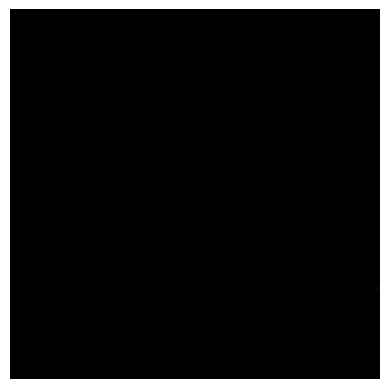

In [3]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(image, cmap='gray')  # Change the colormap if needed
plt.axis('off')  # Hide the axis values
plt.show()


In [15]:
# Determine the maximum and minimum values of the image
max_value = image.max()
min_value = image.min()
median_value = np.median(image)

print(f"Maximum Value: {max_value}")
print(f"Minimum Value: {min_value}")
print(f"Median Value: {median_value}")


# Count pixels with maximum value
count_max_pixels = np.sum(image == max_value)

# Count pixels with minimum value
count_min_pixels = np.sum(image == min_value)

print(f"Number of pixels at maximum value ({max_value}): {count_max_pixels}")
print(f"Number of pixels at minimum value ({min_value}): {count_min_pixels}")

# Get the total number of pixels in the image
total_pixels = image.size

print(f"Total number of pixels in the image: {total_pixels}")



Maximum Value: 65533
Minimum Value: 0
Median Value: 8.0
Number of pixels at maximum value (65533): 215
Number of pixels at minimum value (0): 13472096
Total number of pixels in the image: 62726400


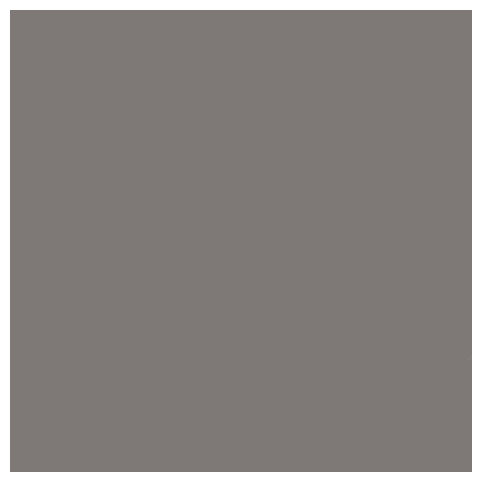

In [11]:
import matplotlib.pyplot as plt

# Create a binary mask where maximum pixels are marked as 1 (or True)
max_pixel_mask = (image == max_value)

# Display the original image and the locations of the maximum pixels
fig, ax = plt.subplots(figsize=(8, 6))

# Display the original image in grayscale
ax.imshow(image, cmap='gray')

# Overlay the locations of the maximum pixels in red
ax.imshow(max_pixel_mask, cmap='Reds', alpha=0.5)  # `alpha` controls the transparency

# Optional: hide axis labels and ticks
ax.axis('off')

plt.show()


In [12]:
import numpy as np
import pandas as pd

# Get the (y, x) coordinates of the maximum pixels
y_coords, x_coords = np.where(image == max_value)

# Convert the coordinates to a pandas DataFrame for tabular display
df = pd.DataFrame({
    'X': x_coords,
    'Y': y_coords
})

# Display the table of coordinates
print(df)


        X     Y
0      13  5940
1    7903  5940
2    7905  5940
3    7909  5940
4    7911  5940
..    ...   ...
210  7837  6012
211  7839  6012
212  7841  6012
213  7843  6012
214  7847  6012

[215 rows x 2 columns]


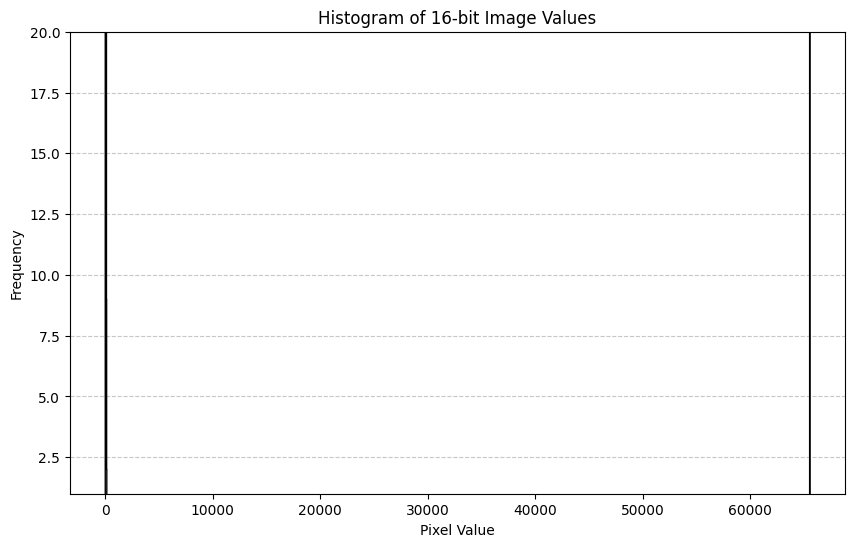

In [17]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))

# Create histogram with a higher number of bins for 16-bit
plt.hist(image.ravel(), bins=4096, histtype='step', color='black')

plt.title('Histogram of 16-bit Image Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Set y-axis range to be between 1 and 100
plt.ylim(1, 20)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [16]:
import numpy as np

# Create a mask for pixels with values between 1000 and 2000
mask = (image >= 1000) & (image <= 2000)

# Count the number of True values in the mask
count = np.sum(mask)

print(f"Number of pixels with values between 1000 and 2000: {count}")


Number of pixels with values between 1000 and 2000: 0


In [18]:
# '/Users/arjunraj/Dropbox (RajLab)/TestFilesNimbusImage/test_video_images/small_folder'

In [20]:
import os
import numpy as np
import tifffile as tf

source_dir = '/Users/arjunraj/Dropbox (RajLab)/TestFilesNimbusImage/test_video_images/small_folder'
destination_dir = '/Users/arjunraj/Dropbox (RajLab)/TestFilesNimbusImage/test_video_images/files_fixed'


# Create the destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Loop through all TIFF files in the source directory
for filename in os.listdir(source_dir):
    if filename.endswith('.tif') or filename.endswith('.tiff'):
        file_path = os.path.join(source_dir, filename)
        
        # Read the image
        image = tf.imread(file_path)
        
        # Check if the image is 16-bit
        if image.dtype == np.uint16:
            print(f"Processing 16-bit image: {filename}")
            
            # Replace values above 65,000 with 0
            image[image > 65000] = 0
        elif image.dtype == np.uint8:
            print(f"Converting 8-bit image to 16-bit: {filename}")
            
            # Convert 8-bit to 16-bit
            image = np.uint16(image) * 256
        
        # Save the processed image to the destination directory
        destination_path = os.path.join(destination_dir, filename)
        tf.imwrite(destination_path, image)
        print(f"Saved processed image to: {destination_path}")

print("Processing complete!")


Processing 16-bit image: red_VID1630_A1_1_00d00h00m.tif
Saved processed image to: /Users/arjunraj/Dropbox (RajLab)/TestFilesNimbusImage/test_video_images/files_fixed/red_VID1630_A1_1_00d00h00m.tif
Processing 16-bit image: gfp_VID1630_A1_1_00d23h56m.tif
Saved processed image to: /Users/arjunraj/Dropbox (RajLab)/TestFilesNimbusImage/test_video_images/files_fixed/gfp_VID1630_A1_1_00d23h56m.tif
Converting 8-bit image to 16-bit: phase_VID1630_A1_1_00d23h56m.tif
Saved processed image to: /Users/arjunraj/Dropbox (RajLab)/TestFilesNimbusImage/test_video_images/files_fixed/phase_VID1630_A1_1_00d23h56m.tif
Processing 16-bit image: gfp_VID1630_A1_1_00d00h00m.tif
Saved processed image to: /Users/arjunraj/Dropbox (RajLab)/TestFilesNimbusImage/test_video_images/files_fixed/gfp_VID1630_A1_1_00d00h00m.tif
Processing 16-bit image: red_VID1630_A1_1_00d23h56m.tif
Saved processed image to: /Users/arjunraj/Dropbox (RajLab)/TestFilesNimbusImage/test_video_images/files_fixed/red_VID1630_A1_1_00d23h56m.tif
Co